Nama   : Shiva Augusta

NIM       : 23/532367/NPA/19947

Matkul : Computer Vision

Model CNN untuk melakukan klasifikasi gambar X-Ray COVID-19

In [ ]:
#mengimpor pustaka Pandas dan memberinya alias 'pd'.
import pandas as pd

#mengimpor modul pyplot dari pustaka Matplotlib dan memberinya alias 'plt'
import matplotlib.pyplot as plt

#mengimpor kelas Sequential dari modul keras dalam pustaka TensorFlow
from tensorflow.keras import Sequential

#Conv2D dan MaxPooling2D adalah lapisan-lapisan konvolusi dan pemaksimalan yang digunakan dalam jaringan konvolusional
#Flatten digunakan untuk meratakan output dari lapisan konvolusi menjadi vektor satu dimensi
#Dropout digunakan untuk mencegah overfitting dengan secara acak mengabaikan sebagian unit selama pelatihan
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#mengimpor kelas ImageDataGenerator dari modul preprocessing.image dalam pustaka TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#mengimpor pengoptimal Adam dari modul optimizers dalam pustaka TensorFlow.
from tensorflow.keras.optimizers import Adam

In [ ]:
#mengimpor modul os yang merupakan modul bawaan Python yang menyediakan berbagai fungsi
import os

#mengimpor pustaka OpenCV (Open Source Computer Vision Library)
import cv2

In [ ]:
#mengimpor modul drive dari pustaka google.colab
from google.colab import drive

#memanggil fungsi mount() dari modul drive untuk melakukan proses mounting (mengaitkan) Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#menetapkan jalur ke direktori utama di Google Drive di mana dataset COVID-19 disimpan.
data_dir = 'drive/My Drive/Dataset/COVID-19/'

#menggunakan fungsi os.path.join() untuk menggabungkan path data_dir dengan nama folder Positif di dalamnya.
data_positive_dir = os.path.join(data_dir, 'Positif')

#menggunakan fungsi os.path.join() untuk menggabungkan path data_dir dengan nama folder Negatif di dalamnya.
data_negative_dir = os.path.join(data_dir, 'Negatif')

In [ ]:
# menggunakan fungsi os.listdir() untuk mendapatkan daftar nama file (gambar) yang ada di dalam direktori data_positive_dir
data_positive_fnames = os.listdir(data_positive_dir)

#menggunakan fungsi os.listdir() untuk mendapatkan daftar nama file (gambar) yang ada di dalam direktori data_negative_dir
data_negative_fnames = os.listdir(data_negative_dir)

In [ ]:
#mencetak jumlah total file (gambar) yang ada di dalam direktori data_positive_dir dengan menggunakan fungsi os.listdir() untuk mendapatkan daftar nama file, kemudian menggunakan fungsi len() untuk menghitung jumlah file dalam daftar tersebut
print('total data positif:', len(os.listdir(data_positive_dir)))

#untuk direktori data_negative_dir, sehingga mencetak jumlah total file (gambar) yang ada di dalamnya. I
print('total data negatif:', len(os.listdir(data_negative_dir)))

total data positif: 58
total data negatif: 98


In [ ]:
#menginstruksikan notebook untuk menampilkan plot Matplotlib secara langsung di dalam notebook
%matplotlib inline

#mengimpor modul pyplot dari pustaka matplotlib dan memberinya alias plt
import matplotlib.pyplot as plt

#mengimpor modul image dari pustaka matplotlib dan memberinya alias mpimg
import matplotlib.image as mpimg

#menetapkan jumlah baris yang akan ditampilkan dalam grid gambar. Dalam hal ini, terdapat 6 baris.
nrows = 6
#menetapkan jumlah baris yang akan ditampilkan dalam grid gambar. Dalam hal ini, terdapat 6 baris.
ncols = 6

#memulai dari gambar pertama dalam dataset
pic_index = 0

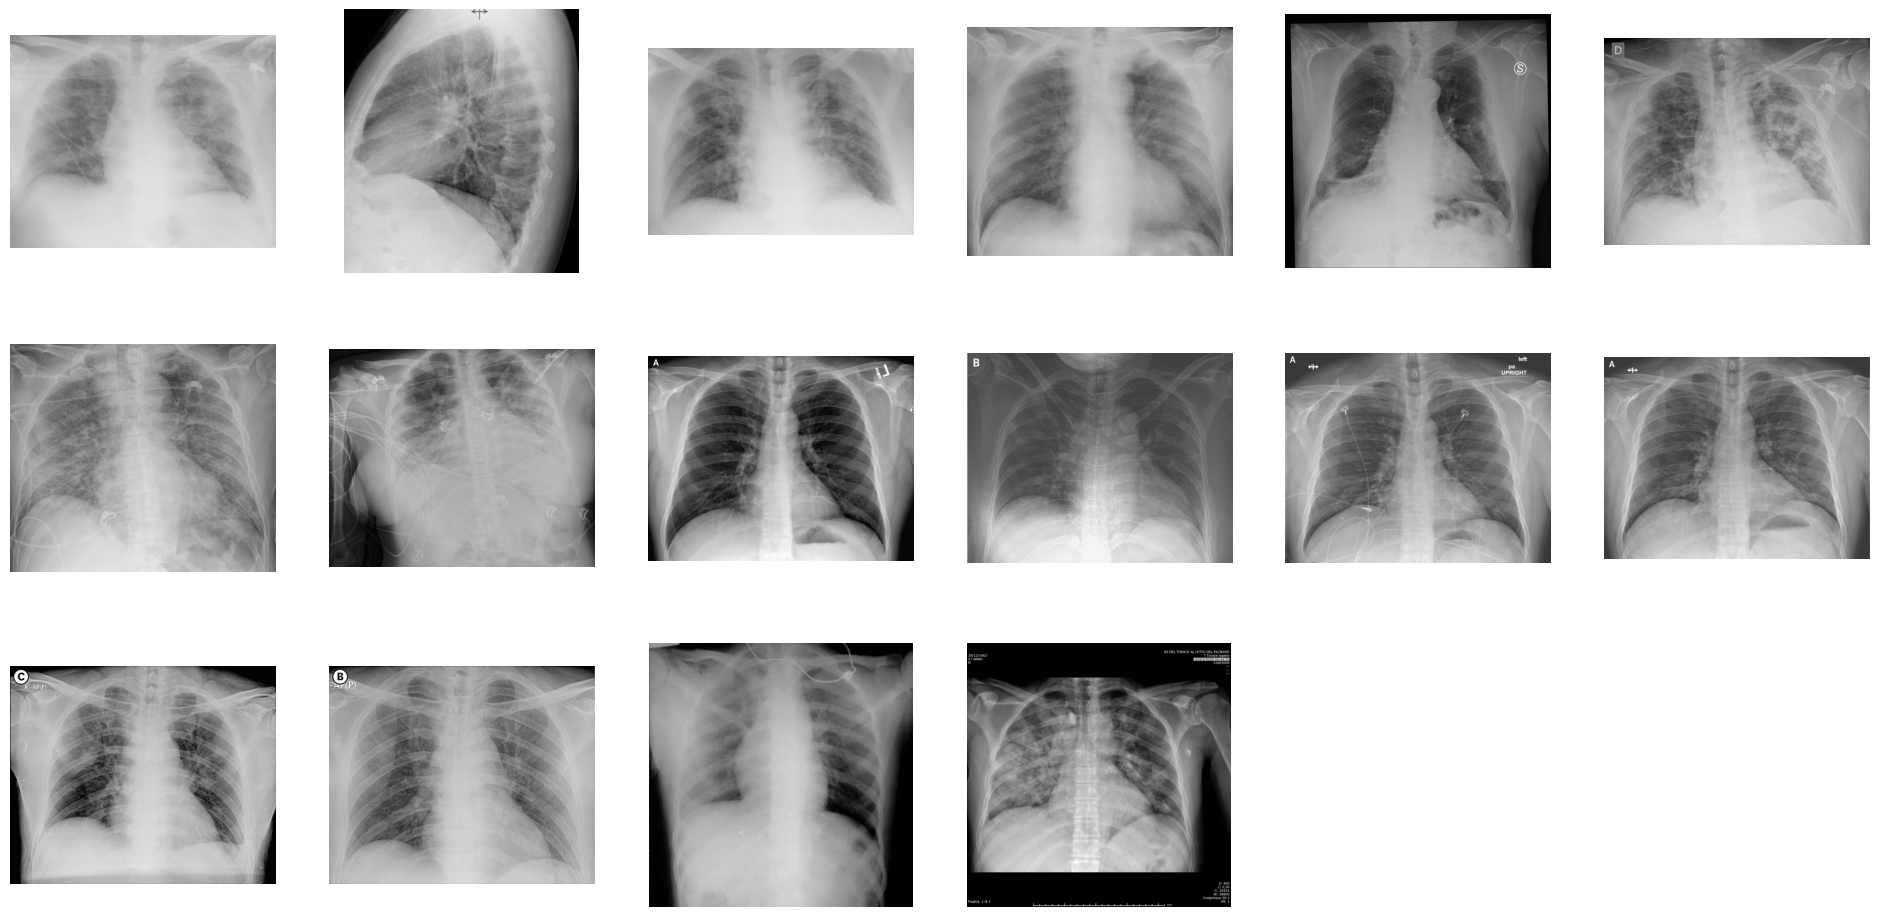

In [ ]:
# Ambil referensi ke objek gambar saat ini
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Tingkatkan nilai indeks gambar
pic_index += 8

# Buat daftar jalur file untuk gambar-gambar positif dan negatif
next_pos_pix = [os.path.join(data_positive_dir, fname) for fname in data_positive_fnames[pic_index-8:pic_index]]
next_neg_pix = [os.path.join(data_negative_dir, fname) for fname in data_negative_fnames[pic_index-8:pic_index]]

# Loop untuk menampilkan setiap gambar dalam grid
for i, img_path in enumerate(next_pos_pix+next_neg_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('off')

    # Baca gambar dari jalur file
    img = cv2.imread(img_path, 0)

    # Konversi gambar ke skala abu-abu dan RGB
    gray_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Tampilkan gambar dalam subplot
    plt.imshow(gray_img)

# Tampilkan grid gambar lengkap
plt.show()

In [ ]:
# Menentukan ukuran gambar target dan ukuran batch
img_size = 152
batch_size = 4

# Membuat objek ImageDataGenerator untuk augmentasi data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Skala ulang nilai piksel menjadi rentang [0,1]
    rotation_range=20,            # Rentang rotasi gambar dalam derajat
    width_shift_range=0.15,       # Rentang pergeseran horizontal gambar
    shear_range=0.15,             # Rentang pergeseran shear gambar
    zoom_range=0.15,              # Rentang zoom-in dan zoom-out gambar
    horizontal_flip=True,         # Melakukan flip horizontal pada gambar
    validation_split=0.2          # Pembagian data validasi sebesar 20%
)

# Membuat generator untuk data pelatihan
train_generator = train_datagen.flow_from_directory(
    'drive/My Drive/Dataset/COVID-19',   # Direktori data
    target_size=(img_size, img_size),    # Ukuran gambar target
    batch_size=batch_size,               # Ukuran batch
    color_mode='grayscale',              # Mode warna gambar (skala abu-abu)
    class_mode='binary',                 # Mode kelas (biner)
    subset='training'                    # Subset data (pelatihan)
)

# Membuat generator untuk data validasi
validation_generator = train_datagen.flow_from_directory(
    'drive/My Drive/Dataset/COVID-19',   # Direktori data
    target_size=(img_size, img_size),    # Ukuran gambar target
    batch_size=batch_size,               # Ukuran batch
    color_mode='grayscale',              # Mode warna gambar (skala abu-abu)
    class_mode='binary',                 # Mode kelas (biner)
    subset='validation'                  # Subset data (validasi)
)


Found 126 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
# Menetapkan nilai learning rate dan jumlah epochs
lr = 0.0001
epochs = 100

# Membangun arsitektur model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Mengompilasi model dengan loss function, optimizer, dan metrik yang sesuai
model.compile(
    loss='binary_crossentropy',        # Loss function untuk klasifikasi biner
    optimizer=Adam(lr=lr),             # Optimizer Adam dengan learning rate yang ditentukan
    metrics=['acc']                    # Metrik evaluasi yang digunakan adalah akurasi
)

# Menampilkan ringkasan arsitektur model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 152, 152, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 76, 76, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)        0

In [ ]:
# Melatih model dengan generator data
history = model.fit(
    train_generator,                                             # Generator data pelatihan
    steps_per_epoch=train_generator.samples // batch_size,       # Jumlah langkah per epoch
    epochs=epochs,                                               # Jumlah epochs
    validation_data=validation_generator,                        # Generator data validasi
    validation_steps=validation_generator.samples // batch_size, # Jumlah langkah validasi per epoch
    verbose=2                                                    # Tingkat detail pelaporan (2: print satu baris per epoch)
)


Epoch 1/100
31/31 - 144s - loss: 0.9693 - acc: 0.5246 - val_loss: 0.6764 - val_acc: 0.6786 - 144s/epoch - 5s/step
Epoch 2/100
31/31 - 124s - loss: 0.6817 - acc: 0.5984 - val_loss: 0.6571 - val_acc: 0.6429 - 124s/epoch - 4s/step
Epoch 3/100
31/31 - 125s - loss: 0.6682 - acc: 0.6148 - val_loss: 0.6851 - val_acc: 0.6071 - 125s/epoch - 4s/step
Epoch 4/100
31/31 - 138s - loss: 0.6775 - acc: 0.6475 - val_loss: 0.6629 - val_acc: 0.6429 - 138s/epoch - 4s/step
Epoch 5/100
31/31 - 124s - loss: 0.6661 - acc: 0.6475 - val_loss: 0.6684 - val_acc: 0.6071 - 124s/epoch - 4s/step
Epoch 6/100
31/31 - 129s - loss: 0.6587 - acc: 0.6393 - val_loss: 0.6226 - val_acc: 0.6786 - 129s/epoch - 4s/step
Epoch 7/100
31/31 - 123s - loss: 0.6844 - acc: 0.6393 - val_loss: 0.6416 - val_acc: 0.6429 - 123s/epoch - 4s/step
Epoch 8/100
31/31 - 135s - loss: 0.6442 - acc: 0.6721 - val_loss: 0.6401 - val_acc: 0.6429 - 135s/epoch - 4s/step
Epoch 9/100
31/31 - 129s - loss: 0.6711 - acc: 0.6475 - val_loss: 0.6965 - val_acc: 0.60

<Axes: title={'center': 'Training and Validation Loss'}>

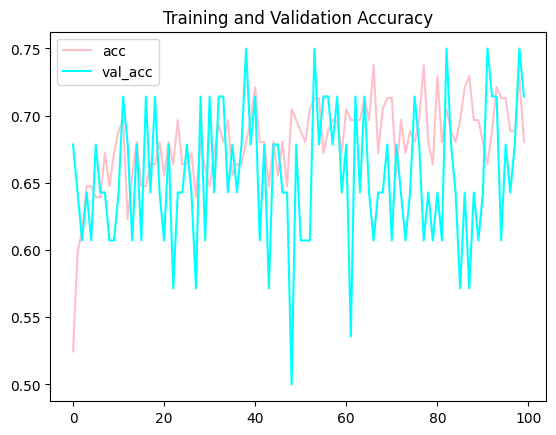

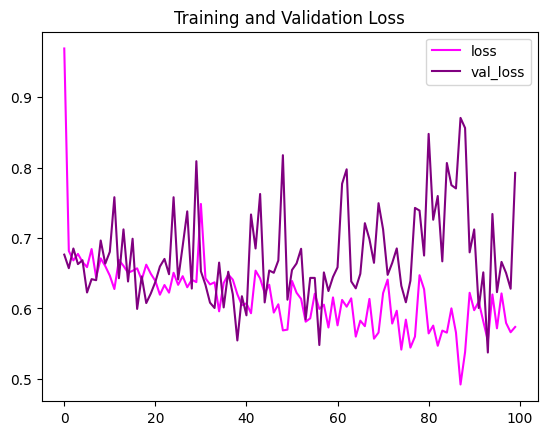

In [ ]:
# Membuat DataFrame dari history.history
history_df = pd.DataFrame(history.history)

# Membuat plot untuk akurasi pelatihan dan validasi dengan warna yang berbeda
history_df[['acc', 'val_acc']].plot(title='Training and Validation Accuracy', color=['pink', 'cyan'])

# Membuat plot untuk loss pelatihan dan validasi dengan warna yang berbeda
history_df[['loss', 'val_loss']].plot(title='Training and Validation Loss', color=['magenta', 'purple'])


Kesimpulan :

Untuk data training tingkat akurasi semakin lama semakin naik dan loss semakin lama semakin turun, maka itu bagus